# Spark DataFrames

- Enable wider audiences beyond “Big Data” engineers to leverage the power of distributed processing
- Inspired by data frames in R and Python (Pandas)
- Designed from the ground-up to support modern big
data and data science applications
- Extension to the existing RDD API

## References
- [Spark SQL, DataFrames and Datasets Guide](https://spark.apache.org/docs/latest/sql-programming-guide.html)
- [Introduction to DataFrames - Python](https://docs.databricks.com/spark/latest/dataframes-datasets/introduction-to-dataframes-python.html)
- [PySpark Cheat Sheet: Spark DataFrames in Python](https://www.datacamp.com/community/blog/pyspark-sql-cheat-sheet)

### DataFrames are :
- The preferred abstraction in Spark
- Strongly typed collection of distributed elements 
- Built on Resilient Distributed Datasets (RDD)
- Immutable once constructed

### With Dataframes you can :
- Track lineage information to efficiently recompute lost data 
- Enable operations on collection of elements in parallel

### You construct DataFrames
- by parallelizing existing collections (e.g., Pandas DataFrames) 
- by transforming an existing DataFrames
- from files in HDFS or any other storage system (e.g., Parquet)

### Features
- Ability to scale from kilobytes of data on a single laptop to petabytes on a large cluster
- Support for a wide array of data formats and storage systems
- Seamless integration with all big data tooling and infrastructure via Spark
- APIs for Python, Java, Scala, and R

### DataFrames versus RDDs
- Nice API for new users familiar with data frames in other programming languages.
- For existing Spark users, the API will make Spark easier to program than using RDDs
- For both sets of users, DataFrames will improve performance through intelligent optimizations and code-generation

## PySpark Shell

**Run the Spark shell:**

~~~ bash
pyspark
~~~

Output similar to the following will be displayed, followed by a `>>>` REPL prompt:

~~~
Python 3.6.5 |Anaconda, Inc.| (default, Apr 29 2018, 16:14:56)
[GCC 7.2.0] on linux
Type "help", "copyright", "credits" or "license" for more information.
2018-09-18 17:13:13 WARN  NativeCodeLoader:62 - Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /__ / .__/\_,_/_/ /_/\_\   version 2.3.1
      /_/

Using Python version 3.6.5 (default, Apr 29 2018 16:14:56)
SparkSession available as 'spark'.
>>>
~~~

Read data and convert to Dataset

~~~ py
df = sqlContext.read.csv("/tmp/irmar.csv", sep=';', header=True)
~~~

~~~
>>> df2.show()
+---+--------------------+------------+------+------------+--------+-----+---------+--------+
|_c0|                name|       phone|office|organization|position|  hdr|    team1|   team2|
+---+--------------------+------------+------+------------+--------+-----+---------+--------+
|  0|      Alphonse Paul |+33223235223|   214|          R1|     DOC|False|      EDP|      NA|
|  1|        Ammari Zied |+33223235811|   209|          R1|      MC| True|      EDP|      NA|
.
.
.
| 18|    Bernier Joachim |+33223237558|   214|          R1|     DOC|False|   ANANUM|      NA|
| 19|   Berthelot Pierre |+33223236043|   601|          R1|      PE| True|       GA|      NA|
+---+--------------------+------------+------+------------+--------+-----+---------+--------+
only showing top 20 rows
~~~

## Transformations, Actions, Laziness

Like RDDs, DataFrames are lazy. Transformations contribute to the query plan, but they don't execute anything.
Actions cause the execution of the query.

### Transformation examples
- filter
- select
- drop
- intersect 
- join
### Action examples
- count 
- collect 
- show 
- head
- take

## Prerequisite

Installation of pyspark

https://sites.google.com/a/ku.th/big-data/pyspark


## Creating a DataFrame in Python

In [ ]:
import sys, subprocess
import os

os.environ["PYSPARK_PYTHON"] = sys.executable

In [ ]:
from pyspark import SparkContext, SparkConf, SQLContext
# The following three lines are not necessary
# in the pyspark shell
conf = SparkConf().setAppName("people").setMaster("local[*]") 
sc = SparkContext(conf=conf)
sc.setLogLevel("ERROR")
sqlContext = SQLContext(sc)

In [ ]:
df = sqlContext.read.json("./people.json") # get a dataframe from json file

df.show(24)

+----+-------+
| age|   name|
+----+-------+
|null|Michael|
|  30|   Andy|
|  19| Justin|
+----+-------+



## Schema Inference

In this exercise, let's explore schema inference. We're going to be using a file called `irmar.txt`. The data is structured, but it has no self-describing schema. And, it's not JSON, so Spark can't infer the schema automatically. Let's create an RDD and look at the first few rows of the file.

Then get data file and extract it.

wget https://www.cpe.ku.ac.th/~cnc/people-data.zip -O data/people-data.zip
 
 
 

In [ ]:
## format
## spark.read.option("header","true").csv("filePath")
df = sqlContext.read.option("header","true").csv("data/HRDataset_v14.csv")  
for line in df.take(10):
  print(line)



Row(Employee_Name='Adinolfi, Wilson  K', EmpID='10026', MarriedID='0', MaritalStatusID='0', GenderID='1', EmpStatusID='1', DeptID='5', PerfScoreID='4', FromDiversityJobFairID='0', Salary='62506', Termd='0', PositionID='19', Position='Production Technician I', State='MA', Zip='01960', DOB='07/10/83', Sex='M ', MaritalDesc='Single', CitizenDesc='US Citizen', HispanicLatino='No', RaceDesc='White', DateofHire='7/5/2011', DateofTermination=None, TermReason='N/A-StillEmployed', EmploymentStatus='Active', Department='Production       ', ManagerName='Michael Albert', ManagerID='22', RecruitmentSource='LinkedIn', PerformanceScore='Exceeds', EngagementSurvey='4.60', EmpSatisfaction='5', SpecialProjectsCount='0', LastPerformanceReview_Date='1/17/2019', DaysLateLast30='0', Absences='1')
Row(Employee_Name='Ait Sidi, Karthikeyan   ', EmpID='10084', MarriedID='1', MaritalStatusID='1', GenderID='1', EmpStatusID='5', DeptID='3', PerfScoreID='3', FromDiversityJobFairID='0', Salary='104437', Termd='1', P

## Hands-on Exercises

You can look at the <a href="http://spark.apache.org/docs/2.3.1/api/python/index.html" target="_blank">DataFrames API documentation</a> 

Let's take a look to file "HRDataset_v14.csv". Each line consists 
of the same information about a person. The fields are :

* Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd
,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermR
eason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfacti
on,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences


In [ ]:
from collections import namedtuple
from itertools import islice
 
 
rdd = sc.textFile("data/HRDataset_v14.csv")
rdd = rdd.mapPartitionsWithIndex(
    lambda idx, it: islice(it, 1, None) if idx == 0 else it 
)

 

In [ ]:


Person = namedtuple('Person', ['Employee_Name', 'EmpID', 'Sex', 'Sex_bool','EmpStatusID', 
                               'Position', 'ManagerName', 'Salary'])
def sexstr_to_bool(s):
    if s  == 'F': return True
    return False

def str_to_int(s):
    if (s.isnumeric()):
      return int(s)
    return 0

def map_to_person(line):
    cols = line.split(",")
    return Person(Employee_Name   = cols[0],
                  EmpID       = cols[1],
                  Sex   = cols[17],
                  Sex_bool   = sexstr_to_bool(cols[17]),
                  EmpStatusID     = cols[5], 
                  Position = cols[13],
                  ManagerName   =  cols[27],
                  Salary       =    str_to_int(cols[10])
                  )
    
people_rdd = rdd.map(map_to_person)


In [ ]:
print(people_rdd.collect())

[Person(Employee_Name='"Adinolfi', EmpID=' Wilson  K"', Sex='M ', Sex_bool=False, EmpStatusID='1', Position='Production Technician I', ManagerName='Michael Albert', Salary=62506), Person(Employee_Name='"Ait Sidi', EmpID=' Karthikeyan   "', Sex='M ', Sex_bool=False, EmpStatusID='1', Position='Sr. DBA', ManagerName='Simon Roup', Salary=104437), Person(Employee_Name='"Akinkuolie', EmpID=' Sarah"', Sex='F', Sex_bool=True, EmpStatusID='0', Position='Production Technician II', ManagerName='Kissy Sullivan', Salary=64955), Person(Employee_Name='"Alagbe', EmpID='Trina"', Sex='F', Sex_bool=True, EmpStatusID='0', Position='Production Technician I', ManagerName='Elijiah Gray', Salary=64991), Person(Employee_Name='"Anderson', EmpID=' Carol "', Sex='F', Sex_bool=True, EmpStatusID='0', Position='Production Technician I', ManagerName='Webster Butler', Salary=50825), Person(Employee_Name='"Anderson', EmpID=' Linda  "', Sex='F', Sex_bool=True, EmpStatusID='0', Position='Production Technician I', Manager

In [ ]:

df = people_rdd.toDF()

In [ ]:
df.show()

+-------------+----------------+---+--------+-----------+--------------------+---------------+------+
|Employee_Name|           EmpID|Sex|Sex_bool|EmpStatusID|            Position|    ManagerName|Salary|
+-------------+----------------+---+--------+-----------+--------------------+---------------+------+
|    "Adinolfi|      Wilson  K"| M |   false|          1|Production Techni...| Michael Albert| 62506|
|    "Ait Sidi| Karthikeyan   "| M |   false|          1|             Sr. DBA|     Simon Roup|104437|
|  "Akinkuolie|          Sarah"|  F|    true|          0|Production Techni...| Kissy Sullivan| 64955|
|      "Alagbe|          Trina"|  F|    true|          0|Production Techni...|   Elijiah Gray| 64991|
|    "Anderson|         Carol "|  F|    true|          0|Production Techni...| Webster Butler| 50825|
|    "Anderson|        Linda  "|  F|    true|          0|Production Techni...|       Amy Dunn| 57568|
|    "Andreola|          Colby"|  F|    true|          0|   Software Engineer|Alex

### Schema

In [ ]:
df.printSchema()

root
 |-- Employee_Name: string (nullable = true)
 |-- EmpID: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Sex_bool: boolean (nullable = true)
 |-- EmpStatusID: string (nullable = true)
 |-- Position: string (nullable = true)
 |-- ManagerName: string (nullable = true)
 |-- Salary: long (nullable = true)



### display

In [ ]:
display(df)

DataFrame[Employee_Name: string, EmpID: string, Sex: string, Sex_bool: boolean, EmpStatusID: string, Position: string, ManagerName: string, Salary: bigint]

### select

In [ ]:
df.select(df["Employee_Name"], df["EmpID"], df["Sex"])

DataFrame[Employee_Name: string, EmpID: string, Sex: string]

In [ ]:
df.select(df["Employee_Name"], df["EmpID"], df["Sex"]).show()

+-------------+----------------+---+
|Employee_Name|           EmpID|Sex|
+-------------+----------------+---+
|    "Adinolfi|      Wilson  K"| M |
|    "Ait Sidi| Karthikeyan   "| M |
|  "Akinkuolie|          Sarah"|  F|
|      "Alagbe|          Trina"|  F|
|    "Anderson|         Carol "|  F|
|    "Anderson|        Linda  "|  F|
|    "Andreola|          Colby"|  F|
|      "Athwal|            Sam"| M |
|   "Bachiochi|          Linda"|  F|
|      "Bacong|     Alejandro "| M |
|   "Baczenski|      Rachael  "|  F|
|     "Barbara|         Thomas"| M |
|    "Barbossa|         Hector"| M |
|      "Barone|   Francesco  A"| M |
|      "Barton|          Nader"| M |
|       "Bates|         Norman"| M |
|        "Beak|     Kimberly  "|  F|
|    "Beatrice|      Courtney "|  F|
|      "Becker|          Renee"|  F|
|      "Becker|          Scott"| M |
+-------------+----------------+---+
only showing top 20 rows



### filter

In [ ]:
df.filter(df["Sex_bool"] ).show()

+-------------+------------+---+--------+-----------+--------------------+------------------+------+
|Employee_Name|       EmpID|Sex|Sex_bool|EmpStatusID|            Position|       ManagerName|Salary|
+-------------+------------+---+--------+-----------+--------------------+------------------+------+
|  "Akinkuolie|      Sarah"|  F|    true|          0|Production Techni...|    Kissy Sullivan| 64955|
|      "Alagbe|      Trina"|  F|    true|          0|Production Techni...|      Elijiah Gray| 64991|
|    "Anderson|     Carol "|  F|    true|          0|Production Techni...|    Webster Butler| 50825|
|    "Anderson|    Linda  "|  F|    true|          0|Production Techni...|          Amy Dunn| 57568|
|    "Andreola|      Colby"|  F|    true|          0|   Software Engineer|   Alex Sweetwater| 95660|
|   "Bachiochi|      Linda"|  F|    true|          0|Production Techni...|    Brannon Miller| 47837|
|   "Baczenski|  Rachael  "|  F|    true|          0|Production Techni...|     David Stanle

### filter + select

In [ ]:
df2 = df.filter(df["Sex"] == "F").select(df['Position'],df['Salary'])

In [ ]:
df2.show()

+--------------------+------+
|            Position|Salary|
+--------------------+------+
|Production Techni...| 64955|
|Production Techni...| 64991|
|Production Techni...| 50825|
|Production Techni...| 57568|
|   Software Engineer| 95660|
|Production Techni...| 47837|
|Production Techni...| 54670|
|Production Techni...| 70131|
|Production Techni...| 59026|
|Database Administ...|110000|
|Production Techni...| 64919|
|Production Techni...| 62910|
|Production Techni...| 66441|
|Production Techni...| 57815|
|      Sr. Accountant|106367|
|Production Techni...| 53492|
|        Accountant I| 63000|
|Production Techni...| 64375|
|  Area Sales Manager| 74326|
|Production Techni...| 63763|
+--------------------+------+
only showing top 20 rows



### orderBy

In [ ]:
(df.filter(df["Sex"] == "F")
   .select(df["Salary"],df["position"])
   .orderBy("Salary")).show()

+------+--------------------+
|Salary|            position|
+------+--------------------+
| 45046|Production Techni...|
| 45069|Production Techni...|
| 45395|Production Techni...|
| 45433|Production Techni...|
| 45998|Production Techni...|
| 46335|Production Techni...|
| 46430|Production Techni...|
| 46738|Production Techni...|
| 46799|Production Techni...|
| 47434|Production Techni...|
| 47750|Production Techni...|
| 47837|Production Techni...|
| 47961|Production Techni...|
| 48413|Production Techni...|
| 48513|Production Techni...|
| 49256|Production Techni...|
| 49773|Production Techni...|
| 49920|Administrative As...|
| 50274|Production Techni...|
| 50750|    Network Engineer|
+------+--------------------+
only showing top 20 rows



### groupBy

In [ ]:
df.groupby(df["Position"])

In [ ]:
df.groupby(df["Position"]).count().show()

+--------------------+-----+
|            Position|count|
+--------------------+-----+
| Senior BI Developer|    3|
|IT Manager - Support|    1|
|Software Engineer...|    1|
|    Network Engineer|    5|
|             Sr. DBA|    2|
|Principal Data Ar...|    1|
|        BI Developer|    4|
|Production Techni...|   57|
|Director of Opera...|    1|
|  Production Manager|   14|
|      Sr. Accountant|    2|
|     President & CEO|    1|
|Sr. Network Engineer|    5|
|  IT Manager - Infra|    1|
|        Accountant I|    3|
|Database Administ...|    5|
|        Data Analyst|    7|
|Shared Services M...|    1|
|   Director of Sales|    1|
|       Sales Manager|    3|
+--------------------+-----+
only showing top 20 rows



WARNING: Don't confuse GroupedData.count() with DataFrame.count(). GroupedData.count() is not an action. DataFrame.count() is an action.

In [ ]:
df.filter(df["Sex_bool"]).count()

176

In [ ]:
df.filter(df['Sex_bool']).select("Employee_Name").show()

+-------------+
|Employee_Name|
+-------------+
|  "Akinkuolie|
|      "Alagbe|
|    "Anderson|
|    "Anderson|
|    "Andreola|
|   "Bachiochi|
|   "Baczenski|
|        "Beak|
|    "Beatrice|
|      "Becker|
|       "Biden|
|      "Billis|
|      "Blount|
|    "Bondwell|
|    "Boutwell|
|       "Brill|
|       "Brown|
|      "Bugali|
|     "Bunbury|
|       "Burke|
+-------------+
only showing top 20 rows



In [ ]:
df.groupBy(df["ManagerName"]).count().show()

+------------------+-----+
|       ManagerName|count|
+------------------+-----+
|  Brian Champaigne|    8|
| Production       |    1|
|     Admin Offices|    1|
|     Lynn Daneault|   13|
|      Eric Dougall|    4|
|     Ketsia Liebig|   21|
|    Michael Albert|   22|
|     David Stanley|   21|
|    Debra Houlihan|    3|
|    Webster Butler|   21|
|        Janet King|   19|
|      Peter Monroe|   14|
|        Simon Roup|   15|
|        John Smith|   14|
|      Elijiah Gray|   21|
|             IT/IS|    2|
|    Brannon Miller|   22|
|     Kelley Spirea|   22|
|Brandon R. LeBlanc|    6|
|   Alex Sweetwater|    9|
+------------------+-----+
only showing top 20 rows



### Exercises

- How many Production Engineer that are Female?
- What are the positions that have salary more than 90000?
- What are the top three  managers that have the most employees?
- What is the most common position whose employees are female?

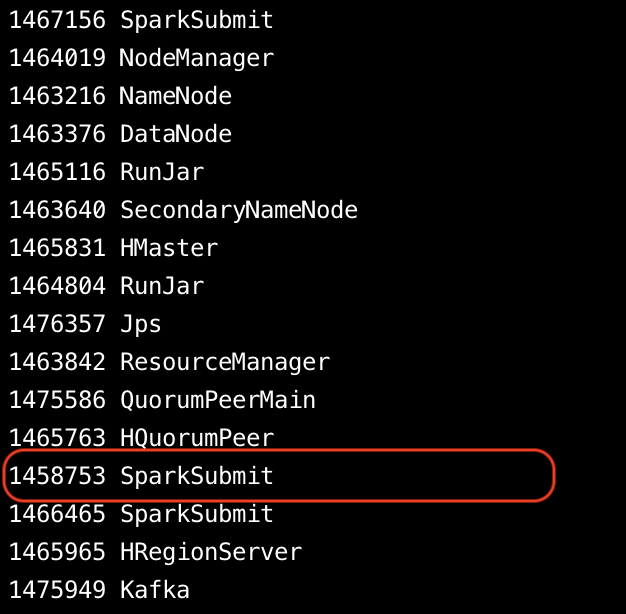

To kill your spark process:

In [ ]:
sc.stop()